# Pymaceuticals Inc.
---

### Analysis

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id_timepoint = clean_df["Drug Regimen"].value_counts()
mouse_id_timepoint.plot(kind="bar", figsize=(6.5,4.5), color='steelblue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show

1. The code generates a bar plot showing the number of observations for each drug regimen in your dataset. It counts the occurrences of each regimen and displays them as bars, with the height of each bar representing the number of observations. The plot includes labeled axes and rotates the x-axis labels for clarity. Capomulin and Ramicane have the highest number of observations, indicating that these drug regimens were administered to the most mice or were recorded the most frequently in the dataset. This suggests a higher level of data collection or interest in these treatments.

______________________________________________________________________________________________________________________________________________________________________________________________________

# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_df['Sex'].value_counts()

# Make the pie chart

gender.plot.pie(
    autopct='%1.1f%%', 
    colors=['steelblue', 'darkorange'], 
    startangle=0,
    ylabel='Count',  
)

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the plot
plt.show()

2. The code generates a pie chart showing the distribution of male versus female mice in the study. It counts the unique mice by gender, revealing that males make up 50.6% of the total and females make up 49.4%. This indicates a nearly equal representation of both genders in the study.

______________________________________________________________________________________________________________________________________________________________________________________________________

#cor_coe = st.pearsonr(avg_tumor_volume['Weight (g)'], 
avg_tumor_volume ['Tumor Volume (mm3)'])[0]

print(f"The correlation coefficient between mouse weight and average weight tumor volume is {cor_coe:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_volume ['Weight (g)'], 
                                                          avg_tumor_volume['Tumor Volume (mm3)'])

x = avg_tumor_volume['Weight (g)'] * slope + intercept

plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='steelblue')
plt.plot(avg_tumor_volume['Weight (g)'], x , "r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

3. The analysis shows a strong positive correlation (0.84) between mouse weight and average tumor volume, indicating that as mouse weight increases, tumor volume tends to increase as well. The linear regression line, which slopes upwards, visually confirms this relationship, reflecting a clear upward trend in tumor volume with increasing mouse weight.


 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_merge = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
display(df_merge.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# Checking the number of mice.
num_mice_df = df_merge["Mouse ID"].nunique()
num_mice_df

249

In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
num_mice_df = df_merge[df_merge.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
num_mice_df_id = num_mice_df["Mouse ID"].unique()
num_mice_df_id


array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse_id = df_merge[df_merge["Mouse ID"].isin(num_mice_df_id)]
dup_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df_merge[~df_merge["Mouse ID"].isin(dup_mouse_id)]
display(clean_df.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [42]:
# Checking the number of mice in the clean DataFrame.
mice_merged_df = clean_df["Mouse ID"].nunique()
mice_merged_df

249

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    "mean",
    "median",
    "var", 
    "std",
    "sem"
])

summary_stats.columns = (
    "Mean Tumor Volume",
    "Median Tumor Volume", 
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev.",
    "Tumor Volume Std. Err."
)
summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

advanced_summary = clean_df.groupby("Drug Regimen").agg(
    mean = ("Tumor Volume (mm3)", "mean"), 
    median = ("Tumor Volume (mm3)", "median"), 
    var = ("Tumor Volume (mm3)", "var"), 
    std = ("Tumor Volume (mm3)", "std"), 
    sem = ("Tumor Volume (mm3)", "sem"), 
              
)

advanced_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

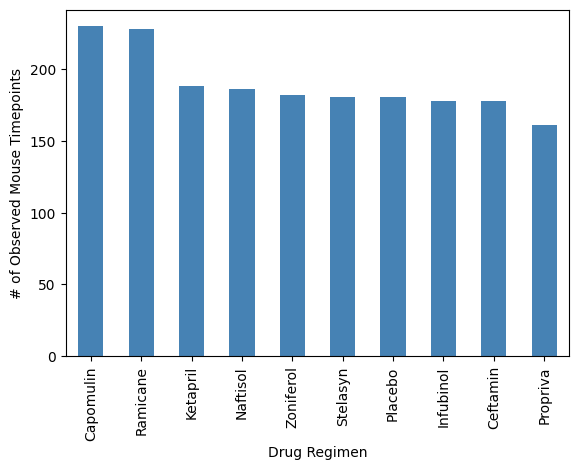

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id_timepoint = clean_df["Drug Regimen"].value_counts()
mouse_id_timepoint.plot(kind="bar", figsize=(6.5,4.5), color='steelblue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

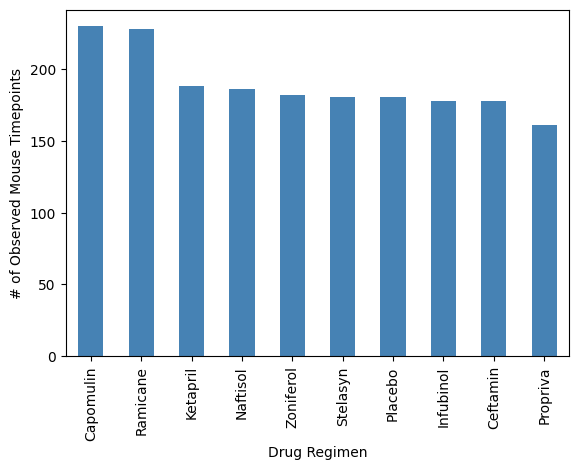

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = clean_df['Drug Regimen'].value_counts()
drug_regimen.plot(kind="bar", figsize=(6.5,4.5), color='steelblue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show


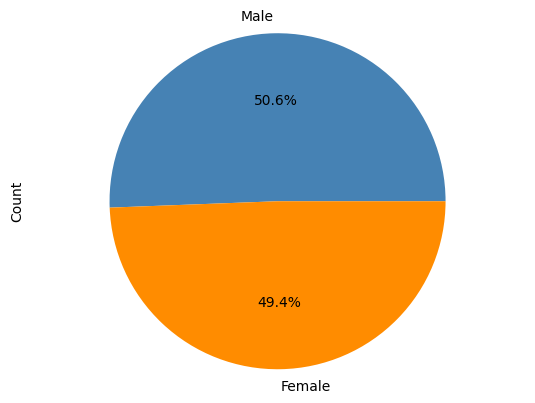

In [67]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_df['Sex'].value_counts()

# Make the pie chart

gender.plot.pie(
    autopct='%1.1f%%', 
    colors=['steelblue', 'darkorange'], 
    startangle=0,
    ylabel='Count',  
)

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the plot
plt.show()


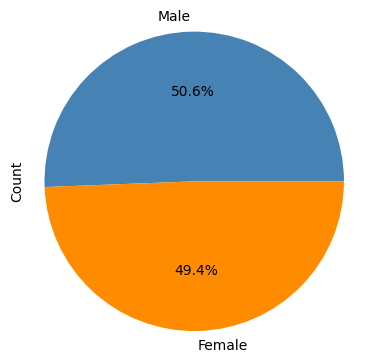

In [71]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_df['Sex'].value_counts() 
m = gender.get('Male', 0)
f = gender.get('Female', 0)

# Make the pie chart
labels = ['Male', 'Female']
sizes = [m, f]
colors = ['steelblue', 'darkorange']

plt.figure(figsize=(4.25, 4.25))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.ylabel('Count')
plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_regimen_filter = clean_df[clean_df["Drug Regimen"].isin(treatment_regimen)]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = treatment_regimen_filter.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(last_timepoint, treatment_regimen_filter, on=["Mouse ID", "Timepoint"], how="left")


In [86]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments: 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset

    tumor_vol_data.append(treatment_df)

    qualities = treatment_df.quantile([0.25, 0.5, 0.75])
    lowerq = qualities[0.25]
    upperq = qualities[0.75]
    i = upperq - lowerq

    # Determine outliers using upper and lower bounds

    upperb = upperq + (1.5*i)
    
    lowerb = upperq - (1.5*i)\
        
    outliers = treatment_df[(treatment_df<lowerb) | (treatment_df>upperb)]

    print(f"{treatment} potential outliers: {outliers}\n")


Capomulin potential outliers: 51    28.430964
70    23.343598
90    28.484033
Name: Tumor Volume (mm3), dtype: float64

Ramicane potential outliers: 40    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol potential outliers: 15    36.321346
52    47.010364
58    45.699331
79    46.250112
Name: Tumor Volume (mm3), dtype: float64

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



C:\Users\tasee\AppData\Local\Temp\ipykernel_32644\365501358.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o', markersize=10))


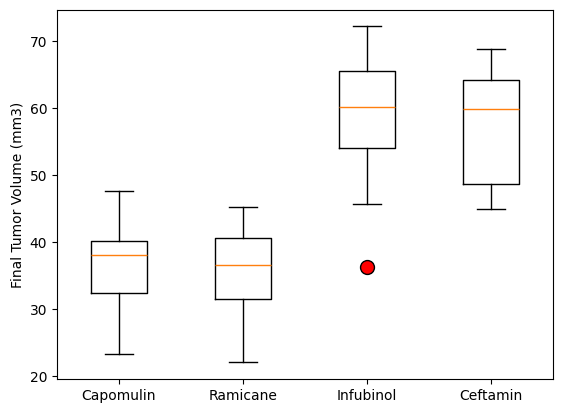

In [85]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o', markersize=10))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [91]:
# Check the content of clean_df
print(clean_df.head())  # See first few rows
print(clean_df.columns)  # Confirm column names

# Check unique values in 'Mouse ID' and 'Drug Regimen'
print(clean_df['Mouse ID'].unique())
print(clean_df['Drug Regimen'].unique())

# Try a simpler filter
test_df = clean_df[clean_df['Mouse ID'] == mouse]
print(test_df)

# Check for hidden characters
clean_df['Mouse ID'] = clean_df['Mouse ID'].str.strip()
clean_df['Drug Regimen'] = clean_df['Drug Regimen'].str.strip()

# Manually inspect the specific row
print(clean_df.loc[(clean_df['Mouse ID'] == '1509') & (clean_df['Drug Regimen'] == 'Capomulin')])

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')
['b128' 'f932' 'g107' 'a457' 'c819' 'h246' 'p189' 'n923' 'q119' 'f993'
 'z234' 'b559' 'y260' 'x930' 'o725' 'z969' 'v835' 'r604' 'n304' 'l700'
 'x336' 'l725' 'm133' 'v295' '

<function matplotlib.pyplot.show(close=None, block=None)>

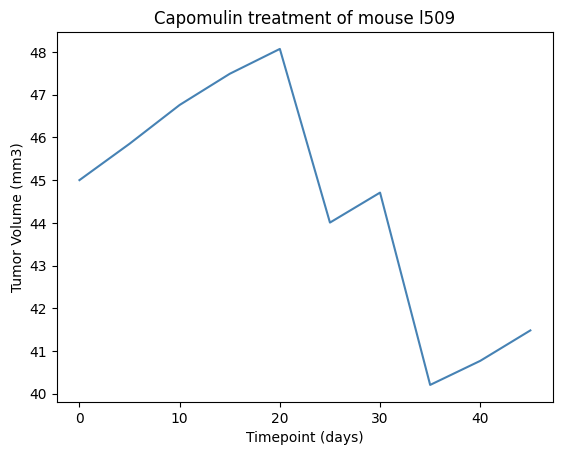

In [113]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'

# Filter the DataFrame for the specific mouse treated with Capomulin
mouse_df = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

# Generate a line plot of tumor volume vs. time point for this mouse
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], linestyle='-', color='steelblue')

# Add plot title and labels
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show

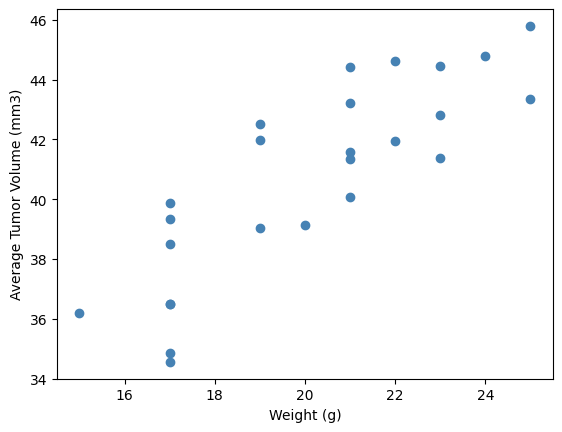

In [115]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_regimen.groupby('Mouse ID').mean(numeric_only=True)

plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='steelblue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average weight tumor volume is 0.84


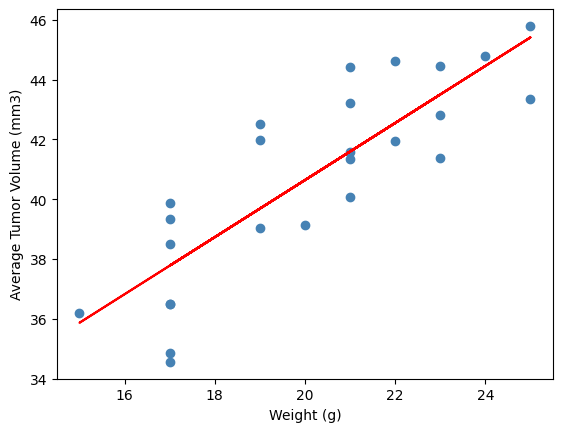

In [120]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cor_coe = st.pearsonr(avg_tumor_volume['Weight (g)'], 
avg_tumor_volume ['Tumor Volume (mm3)'])[0]

print(f"The correlation coefficient between mouse weight and average weight tumor volume is {cor_coe:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_volume ['Weight (g)'], 
                                                          avg_tumor_volume['Tumor Volume (mm3)'])

x = avg_tumor_volume['Weight (g)'] * slope + intercept

plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='steelblue')
plt.plot(avg_tumor_volume['Weight (g)'], x , "r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()